### Import librairies

In [6]:
# Main libraries
import numpy as np
import pandas as pd
import joblib

# Libraries for vizualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Library for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

# Load the lgbmclassifier model

In [ ]:
# Load machine learning model
model_lgbm_1 = joblib.load("model_lgbm_1.joblib")

### Read train_df.csv

In [70]:
train_df = pd.read_csv('train_df.csv')

In [71]:
# remove special characters in train_df feature names
train_df.columns = train_df.columns.str.replace(':', '')
train_df.columns = train_df.columns.str.replace(',', '')
train_df.columns = train_df.columns.str.replace(']', '')
train_df.columns = train_df.columns.str.replace('[', '')
train_df.columns = train_df.columns.str.replace('{', '')
train_df.columns = train_df.columns.str.replace('}', '')
train_df.columns = train_df.columns.str.replace('"', '')

In [72]:
# Create X (features matrix) and y (Target) from train_df
X = train_df.drop(['index', 'SK_ID_CURR', 'TARGET'], 1)
y = train_df.TARGET

### Read test_df.csv

In [21]:
test_df = pd.read_csv('test_df.csv')

In [22]:
# remove special characters in test_df feature names
test_df.columns = test_df.columns.str.replace(':', '')
test_df.columns = test_df.columns.str.replace(',', '')
test_df.columns = test_df.columns.str.replace(']', '')
test_df.columns = test_df.columns.str.replace('[', '')
test_df.columns = test_df.columns.str.replace('{', '')
test_df.columns = test_df.columns.str.replace('}', '')
test_df.columns = test_df.columns.str.replace('"', '')

In [23]:
# Load machine learning model
model = joblib.load("C:/Users/33624/model_lgbm_1.joblib")

In [75]:
# Create X_test (features matrix) from test_df
X_test = test_df.drop(['index', 'SK_ID_CURR'], 1)

## Feature importance using 'best' parameters (roc_auc optimized)

### Feature importance with SHAP (SHapley Additive exPlanations)

In [66]:
import shap
# load JS visualization code to notebook
shap.initjs()

In [78]:
# Create explainer from TreeExplainer and model_lgbm_1
startFitTime = time.time()

explainer_1 = shap.TreeExplainer(model_lgbm_1)

executionTime = (time.time() - startFitTime)
print('Execution time in seconds: ' + str(executionTime))
print('Execution time in minutes: ' + str(executionTime / 60))

Execution time in seconds: 2.495323419570923
Execution time in minutes: 0.04158872365951538


In [15]:
# Create explainer_values from explainer_1 and X
startFitTime = time.time()

explainer_values_1 = explainer_1(X)

executionTime = (time.time() - startFitTime)
print('Execution time in seconds: ' + str(executionTime))
print('Execution time in minutes: ' + str(executionTime / 60))

Execution time in seconds: 1166.6335008144379
Execution time in minutes: 19.443891680240633


In [16]:
# Create explainer_values from explainer_1 and X_test
startTime = time.time()

explainer_values_test_1 = explainer_1(X_test)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
print('Execution time in minutes: ' + str(executionTime / 60))

Execution time in seconds: 51.562928438186646
Execution time in minutes: 0.8593821406364441


### Exploring the shapes of explainer_values

In [17]:
explainer_values_test_1.values.shape

(48744, 795, 2)

In [71]:
explainer_values_1.values.shape

(307507, 795, 2)

In [74]:
explainer_values_1.values[0].shape

(795, 2)

In [76]:
explainer_values_1.values[:, :, 0]

array([[-9.17929420e-02, -4.28662111e-03, -4.10850388e-04, ...,
         0.00000000e+00,  0.00000000e+00,  1.46651528e-06],
       [ 8.56542080e-02, -2.23326769e-03,  6.25880886e-04, ...,
         0.00000000e+00,  0.00000000e+00,  3.59369352e-06],
       [-2.50649078e-01,  1.00437512e-02, -6.82728422e-04, ...,
         0.00000000e+00,  0.00000000e+00, -1.01460572e-05],
       ...,
       [ 9.39402598e-02, -3.76133800e-03, -1.58204140e-03, ...,
         0.00000000e+00,  0.00000000e+00, -7.47101919e-06],
       [ 8.18348674e-02, -2.54708584e-03, -4.64719140e-04, ...,
         0.00000000e+00,  0.00000000e+00, -3.10201272e-04],
       [ 6.76076566e-02, -1.82192062e-03,  1.03288134e-03, ...,
         0.00000000e+00,  0.00000000e+00, -2.64458770e-04]])

In [77]:
explainer_values_1.values[:, :, 0].shape

(307507, 795)

### Plot the global feature importances

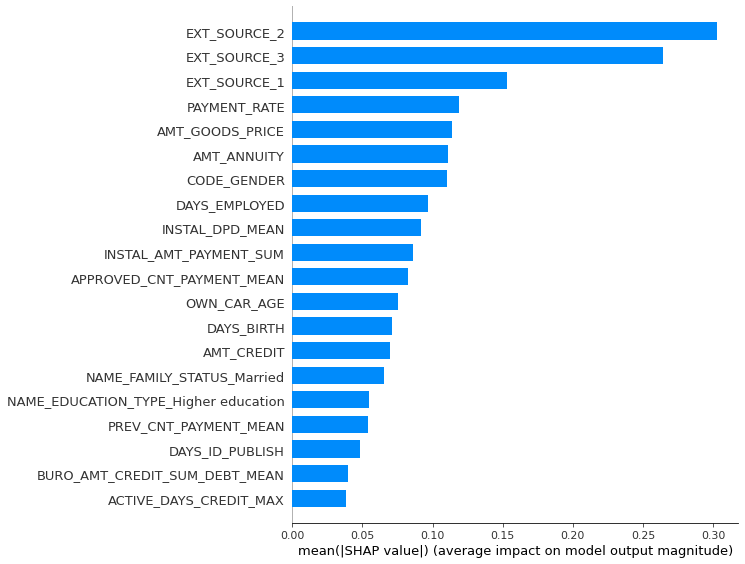

In [78]:
# Plot summary_plot as barplot (global feature importance on X dataset):
shap.summary_plot(shap_values = explainer_values_1.values[:, :, 0], 
                  features = X,
                  max_display = 20,
                  plot_type = 'bar')

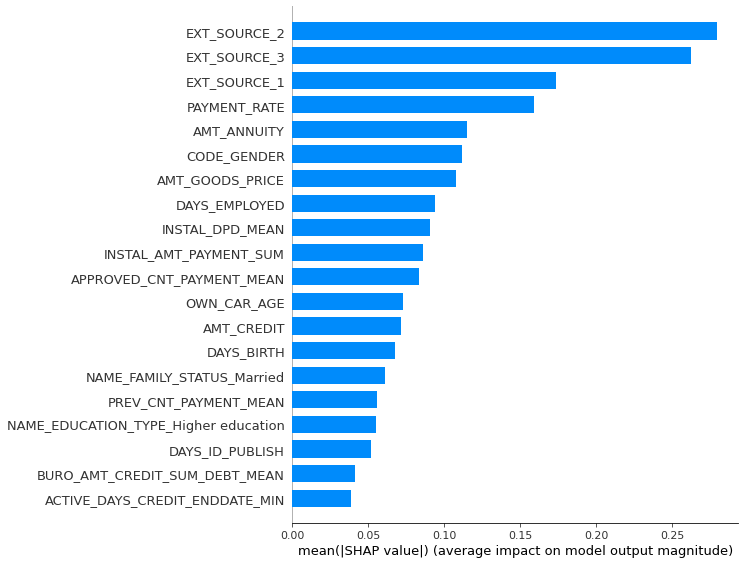

In [18]:
# Plot summary_plot as barplot (global feature importance on X_test dataset):
shap.summary_plot(shap_values = explainer_values_test_1.values[:, :, 0], 
                  features = X_test,
                  max_display = 20,
                  plot_type = 'bar')

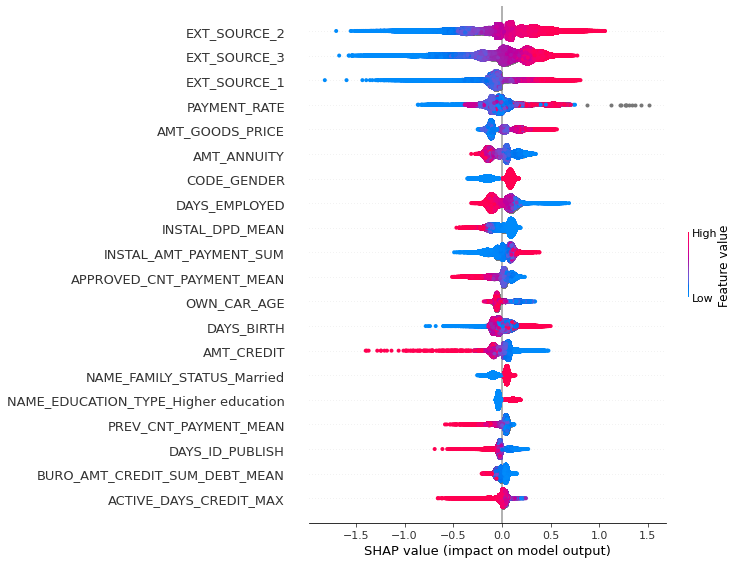

In [21]:
# Plot summary_plot (global feature importance on X dataset):
shap.summary_plot(shap_values = explainer_values_1.values[:, :, 0], 
                  features = X,
                  max_display = 20,
                  plot_type = 'dot')

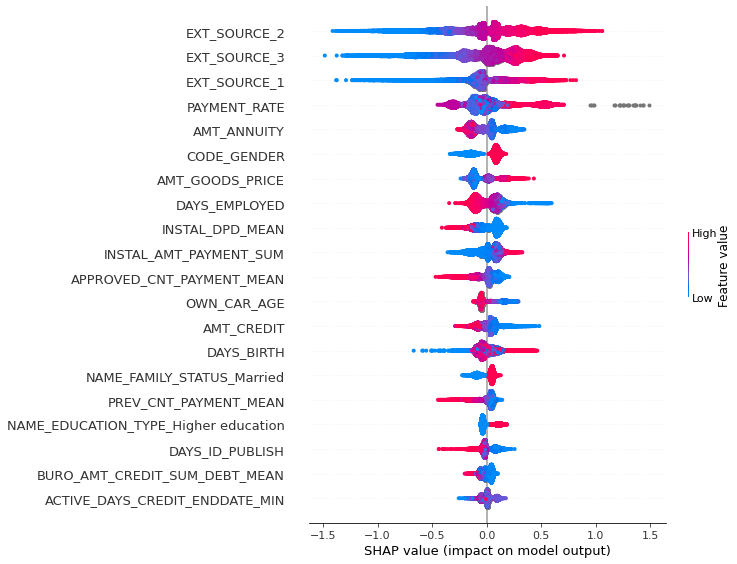

In [19]:
# Plot summary_plot (global feature importance on X_test dataset):
shap.summary_plot(shap_values = explainer_values_test_1.values[:, :, 0], 
                  features = X_test,
                  max_display = 20,
                  plot_type = 'dot')

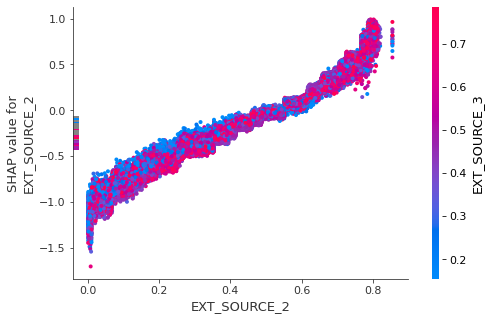

In [22]:
# Plot dependance_plot for 'EXT_SOURCE_2' (X dataset)
shap.dependence_plot(ind = "EXT_SOURCE_2", 
                     shap_values = explainer_values_1.values[:, :, 0], 
                     features = X, 
                     interaction_index = 'auto')

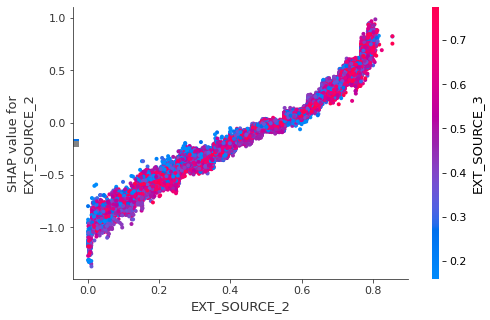

In [23]:
# Plot dependance_plot for 'EXT_SOURCE_2' (X_test dataset)
shap.dependence_plot(ind = "EXT_SOURCE_2", 
                     shap_values = explainer_values_test_1.values[:, :, 0], 
                     features = X_test, 
                     interaction_index = 'auto')

### Plot the local feature importances

y = 1.0


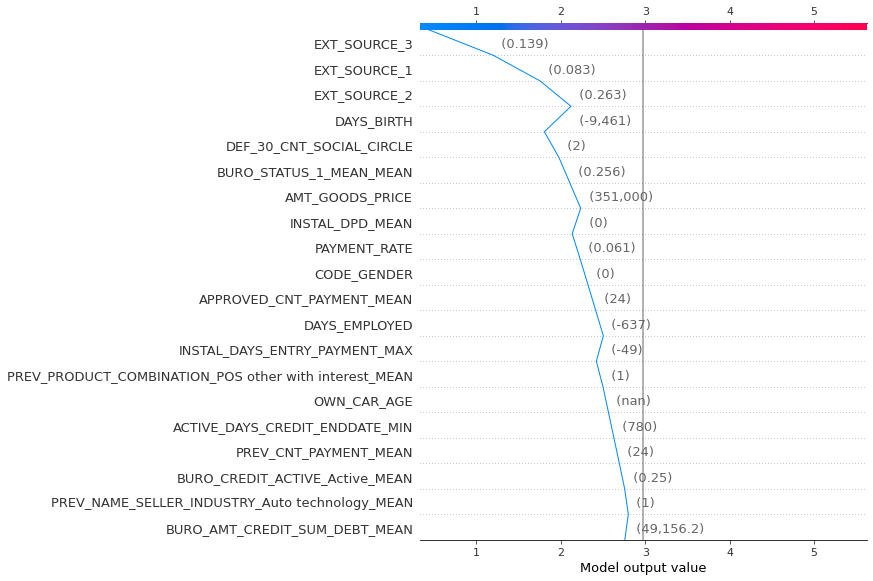

In [64]:
# Plot decision_plot for the customer 0 (dataset X)
cust_idx = 0
print('y =', y[cust_idx])
shap.decision_plot(base_value = explainer_values_1.base_values[0][0],
                   shap_values = explainer_values_1.values[cust_idx, :, 0],
                   features = X,
                   feature_display_range = slice(-1, -21, -1))

In [61]:
# Plot force_plot for a single customer (customer 0 - dataset X)
cust_idx = 0
print('y =', y[cust_idx])
shap.force_plot(base_value = explainer_values_1.base_values[0][0],
                shap_values = explainer_values_1.values[cust_idx, :, 0],
                features = X.iloc[cust_idx, :])

y = 1.0


y = 1.0


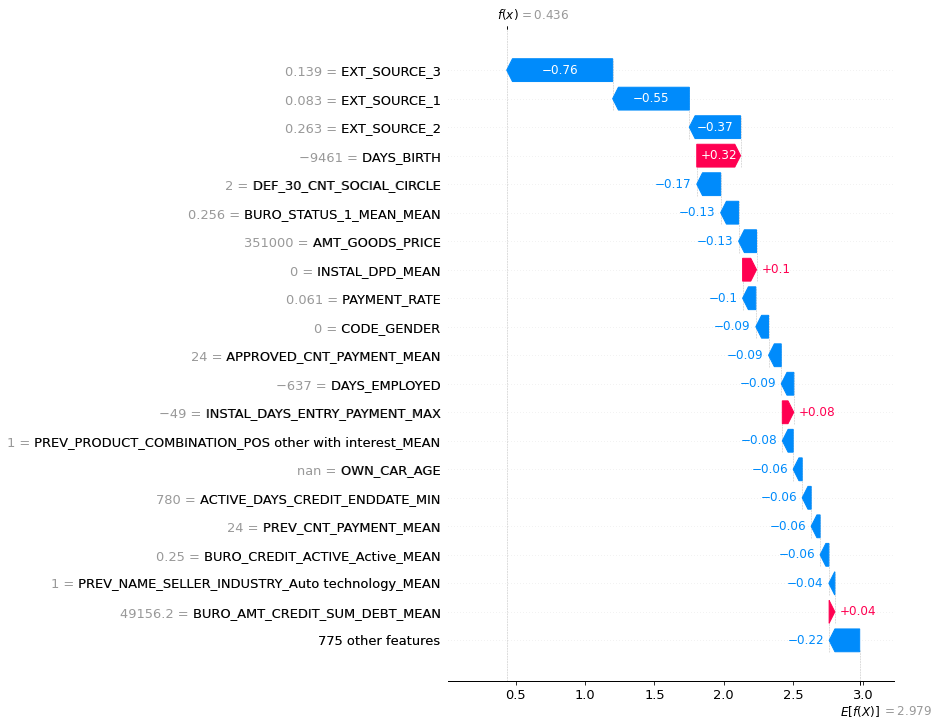

In [80]:
# Waterfall plot for the customer 0 (dataset X)
cust_idx = 0
print('y =', y[cust_idx])
shap.waterfall_plot(shap_values = explainer_values_1[cust_idx, :, 0],
                    max_display = 21)

y = 1.0


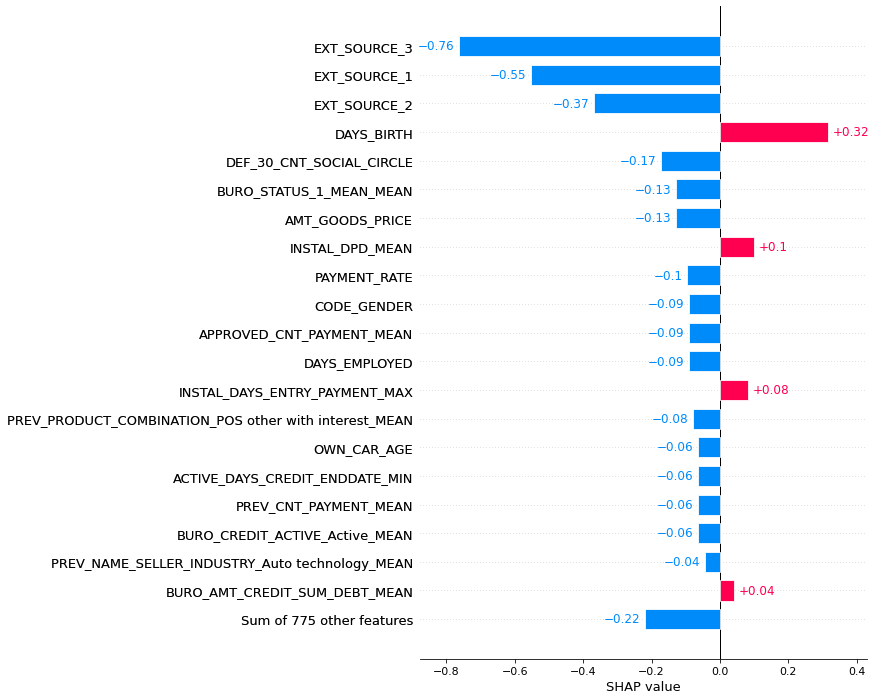

In [85]:
# Local bar plot (customer 0 - dataset X)
cust_idx = 0
print('y =', y[cust_idx])
shap.plots.bar(shap_values = explainer_values_1[cust_idx, :, 0], 
               max_display = 21)

y = 0.0


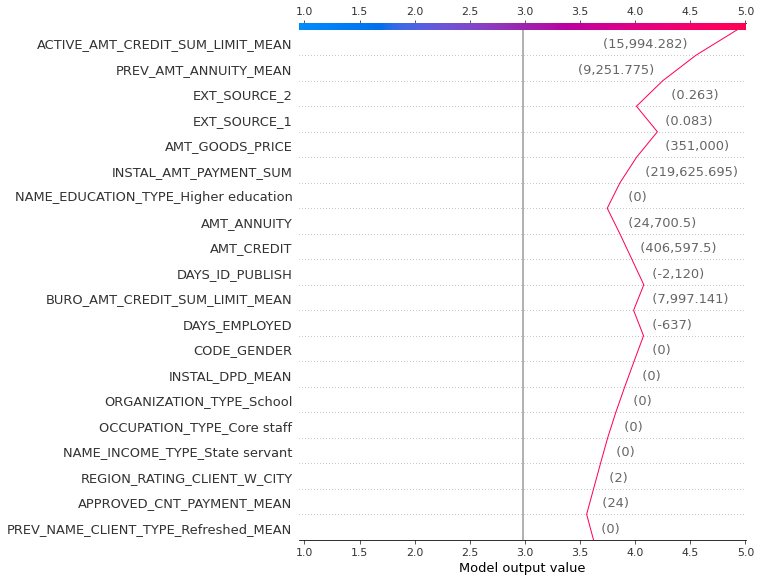

In [65]:
# Plot decision_plot for the customer 1 (dataset X)
cust_idx = 1
print('y =', y[cust_idx])
shap.decision_plot(base_value = explainer_values_1.base_values[0][0],
                   shap_values = explainer_values_1.values[cust_idx, :, 0],
                   features = X,
                   feature_display_range = slice(-1, -21, -1))

In [62]:
# Plot force_plot for a single customer (customer 1 - dataset X)
cust_idx = 1
print('y =', y[cust_idx])
shap.force_plot(base_value = explainer_values_1.base_values[0][0],
                shap_values = explainer_values_1.values[cust_idx, :, 0],
                features = X.iloc[cust_idx, :])

y = 0.0


y = 0.0


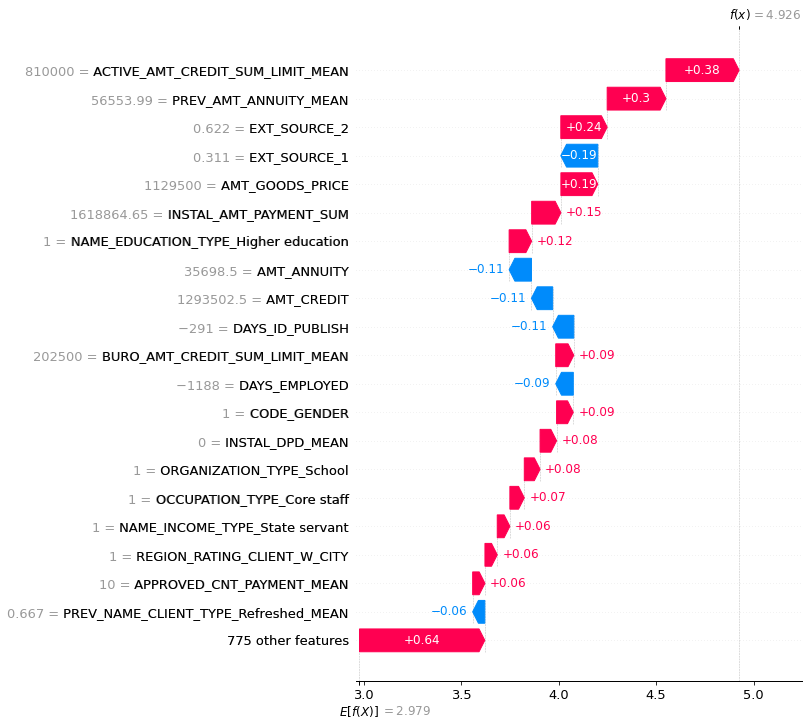

In [81]:
# Waterfall plot for the customer 1 (dataset X)
cust_idx = 1
print('y =', y[cust_idx])
shap.waterfall_plot(shap_values = explainer_values_1[cust_idx, :, 0],
                    max_display = 21)

y = 0.0


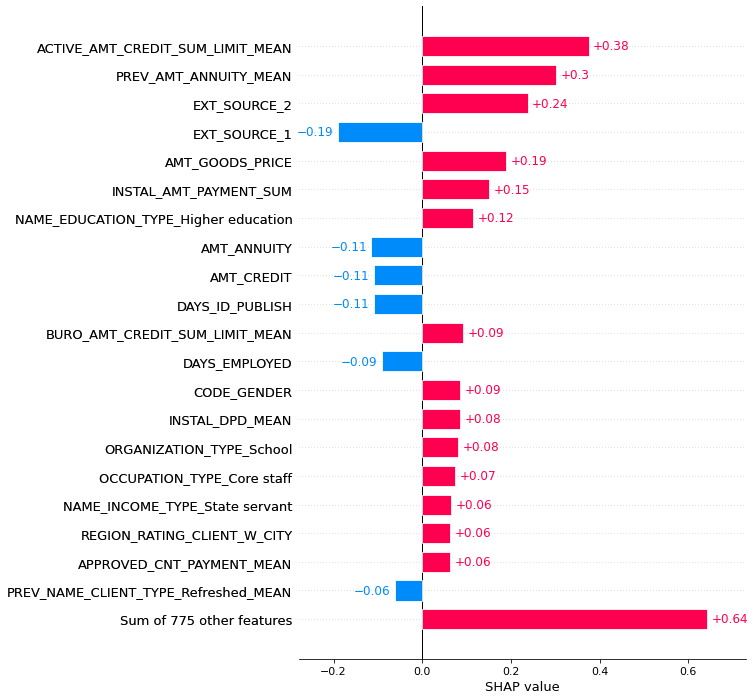

In [86]:
# Local bar plot (customer 1 - dataset X)
cust_idx = 1
print('y =', y[cust_idx])
shap.plots.bar(shap_values = explainer_values_1[cust_idx, :, 0], 
               max_display = 21)

y = 0.0


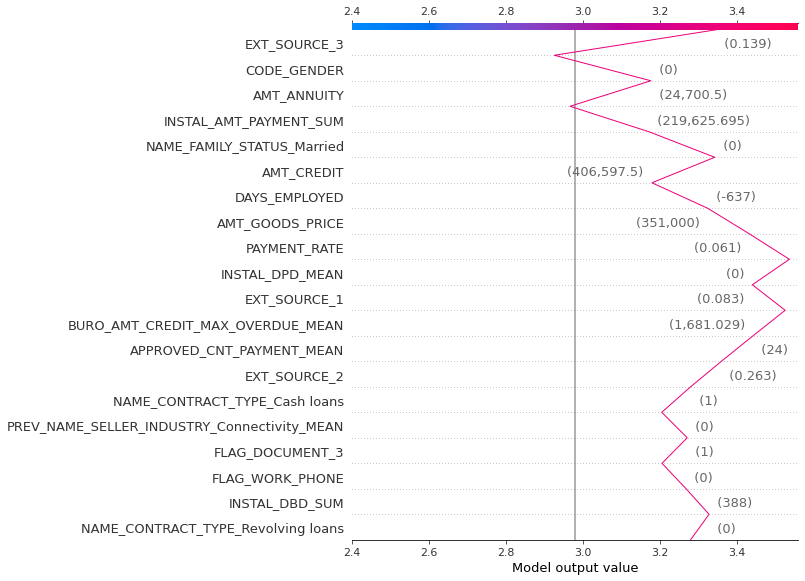

In [66]:
# Plot decision_plot for the customer 2 (dataset X)
cust_idx = 2
print('y =', y[cust_idx])
shap.decision_plot(base_value = explainer_values_1.base_values[0][0],
                   shap_values = explainer_values_1.values[cust_idx, :, 0],
                   features = X,
                   feature_display_range = slice(-1, -21, -1))

y = 0.0


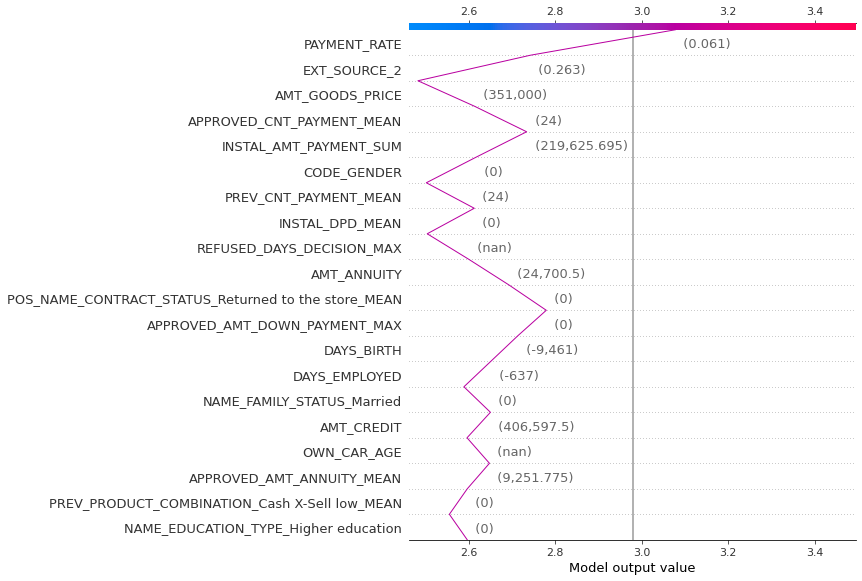

In [67]:
# Plot decision_plot for the customer 3 (dataset X)
cust_idx = 3
print('y =', y[cust_idx])
shap.decision_plot(base_value = explainer_values_1.base_values[0][0],
                   shap_values = explainer_values_1.values[cust_idx, :, 0],
                   features = X,
                   feature_display_range = slice(-1, -21, -1))

y_predict_proba = 0.030269803148691463


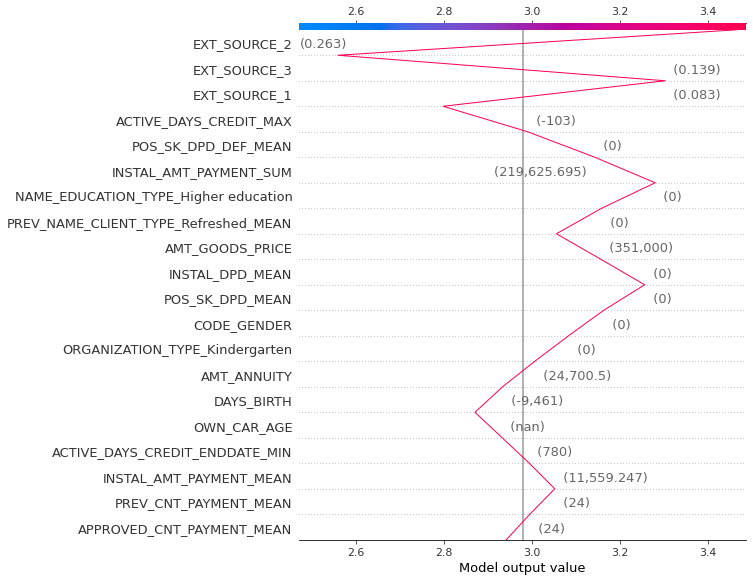

In [55]:
# Plot decision_plot for the customer 0 (dataset X_test)
cust_idx = 0
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.decision_plot(base_value = explainer_values_test_1.base_values[0][0],
                   shap_values = explainer_values_test_1.values[cust_idx, :, 0],
                   features = X_test,
                   feature_display_range = slice(-1, -21, -1))

In [68]:
# Plot decision_plot for the customer 0 (dataset X_test)
cust_idx = 0
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.force_plot(base_value = explainer_values_test_1.base_values[0][0],
                shap_values = explainer_values_test_1.values[cust_idx, :, 0],
                features = X_test.iloc[cust_idx, :])

y_predict_proba = 0.030269803148691463


y_predict_proba = 0.030269803148691463


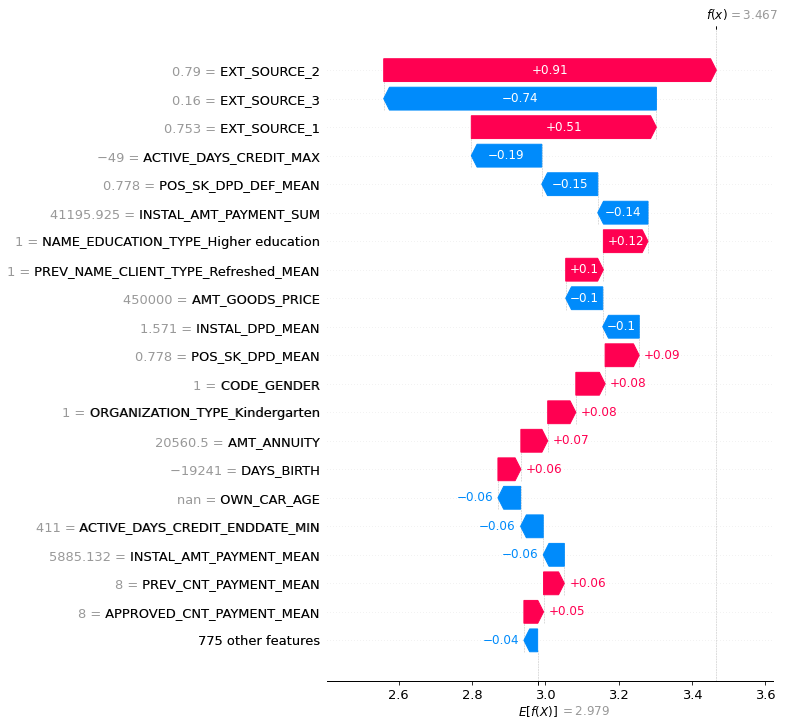

In [82]:
# Waterfall plot for the customer 0 (dataset X_test)
cust_idx = 0
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.waterfall_plot(shap_values = explainer_values_test_1[cust_idx, :, 0],
                    max_display = 21)

y_predict_proba = 0.030269803148691463


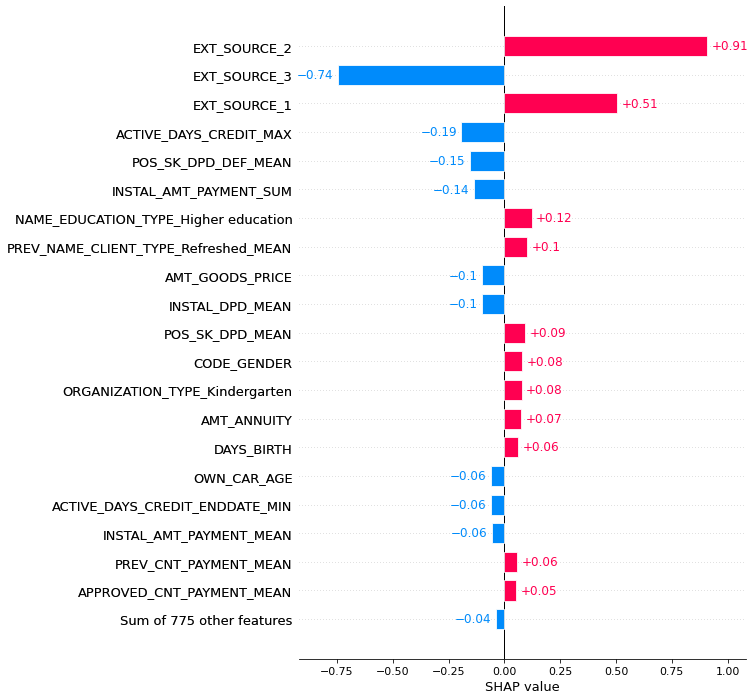

In [87]:
# Local bar plot (customer 0 - dataset X_test)
cust_idx = 0
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.plots.bar(shap_values = explainer_values_test_1[cust_idx, :, 0], 
               max_display = 21)

y_predict_proba = 0.1939450548934631


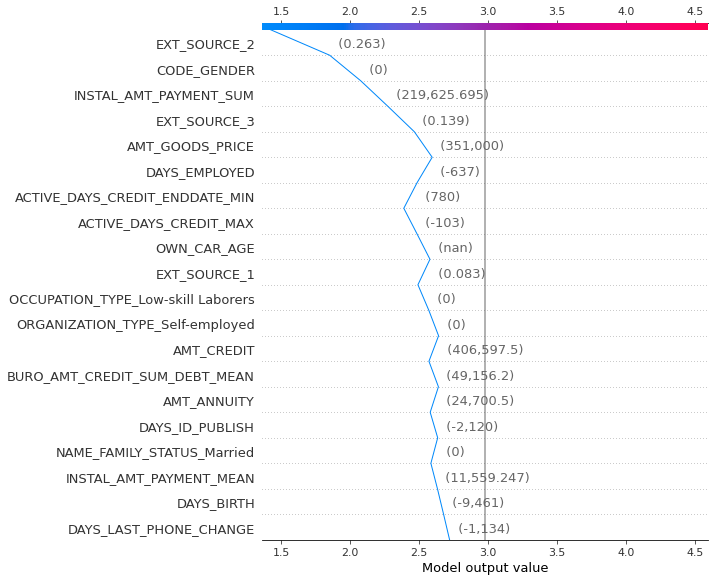

In [54]:
# Plot decision_plot for the customer 1 (dataset X_test)
cust_idx = 1
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.decision_plot(base_value = explainer_values_test_1.base_values[0][0],
                   shap_values = explainer_values_test_1.values[cust_idx, :, 0],
                   features = X,
                   feature_display_range = slice(-1, -21, -1))

y_predict_proba = 0.1939450548934631


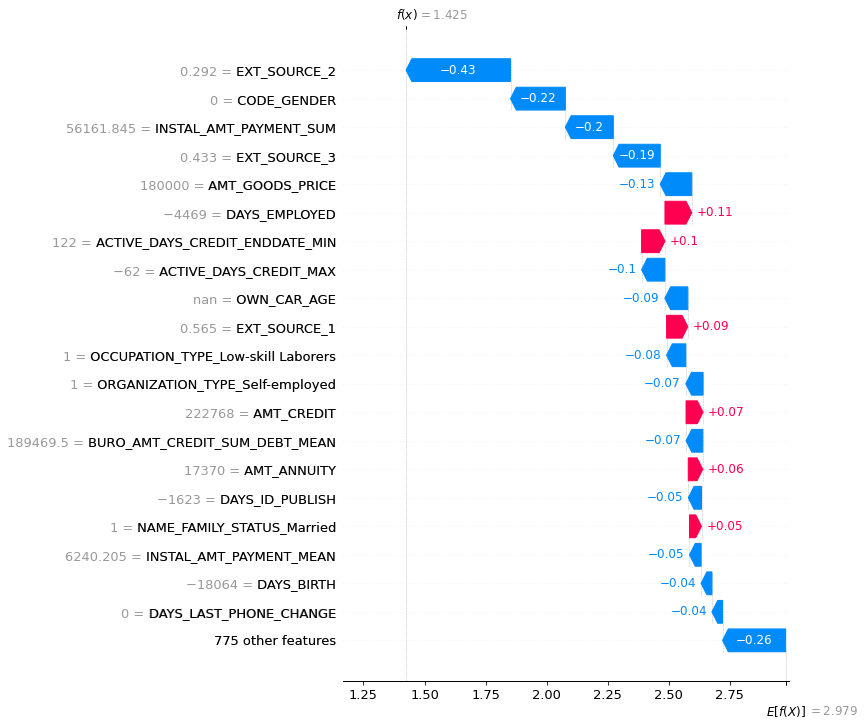

In [83]:
# Waterfall plot for the customer 1 (dataset X_test)
cust_idx = 1
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.waterfall_plot(shap_values = explainer_values_test_1[cust_idx, :, 0],
                    max_display = 21)

y_predict_proba = 0.1939450548934631


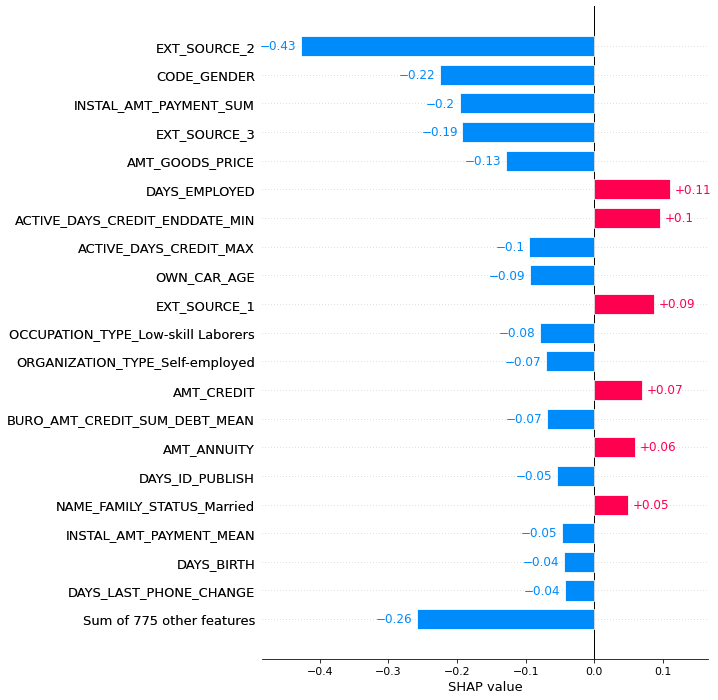

In [88]:
# Local bar plot (customer 1 - dataset X_test)
cust_idx = 1
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.plots.bar(shap_values = explainer_values_test_1[cust_idx, :, 0], 
               max_display = 21)

y_predict_proba = 0.029646022519356014


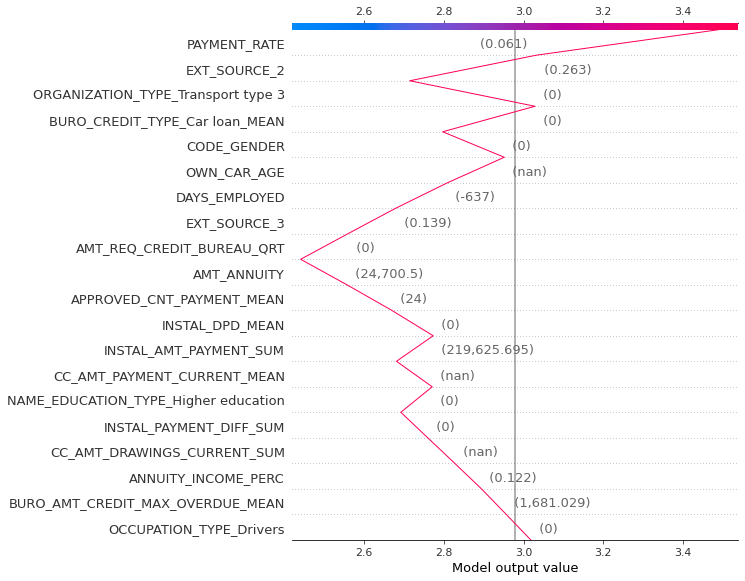

In [53]:
# Plot decision_plot for the customer 2 (dataset X_test)
cust_idx = 2
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.decision_plot(base_value = explainer_values_test_1.base_values[0][0],
                   shap_values = explainer_values_test_1.values[cust_idx, :, 0],
                   features = X,
                   feature_display_range = slice(-1, -21, -1))

y_predict_proba = 0.043573750692036645


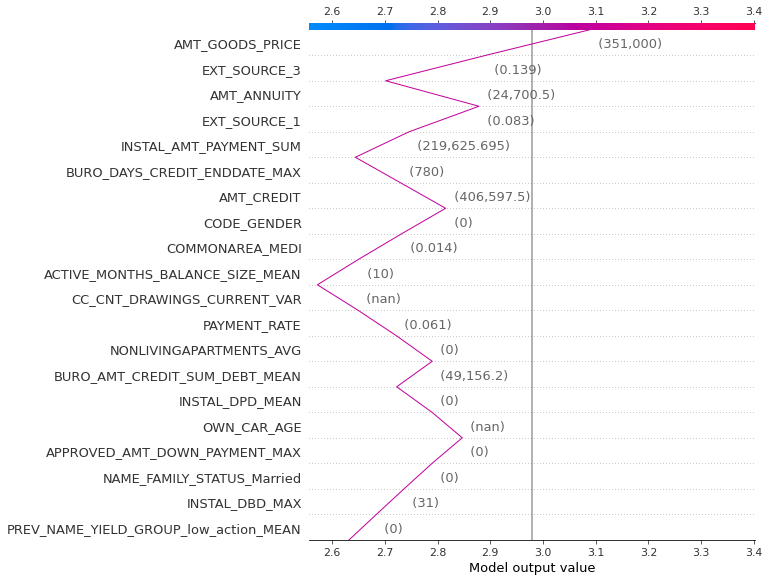

In [52]:
# Plot decision_plot for the customer 3 (dataset X_test)
cust_idx = 3
print('y_predict_proba =', y_predict_1[cust_idx, 1])
shap.decision_plot(base_value = explainer_values_test_1.base_values[0][0],
                   shap_values = explainer_values_test_1.values[cust_idx, :, 0],
                   features = X,
                   feature_display_range = slice(-1, -21, -1))

### Analyses on X dataset (train dataset)

In [131]:
# Create a list of indexes when customer can not repay the loan
index_neg = y.loc[y == 1].index.tolist()

# Create a list of indexes when customer can repay the loan
index_pos = y.loc[y == 0].index.tolist()

# Create a list of 20 most importance feature indexes
index_feat = importance_df.head(20).index.tolist()

In [226]:
len(index_pos)

282682

In [174]:
len(index_neg)

24825

In [175]:
len(index_feat)

20

In [178]:
print(index_feat)

[9, 125, 322, 31, 32, 7, 30, 5, 244, 6, 0, 649, 578, 13, 630, 363, 320, 12, 10, 130]


In [204]:
shap_values.values[index_neg].shape

(24825, 795)

In [224]:
# Create the array with only customers who can not repay their loan
array_neg = shap_values.values[index_neg]

# Create empty dictionnary
dict_neg = {}

# Fill the dictionnary with the 20 most important features as keys
# and the 24825 corresponding shap values for each feature
for i, feat in enumerate(index_feat):
    dict_neg[X.columns[feat]] = array_neg[:, index_feat[i]].tolist()

In [236]:
# Create the array with only customers who can repay their loan
array_pos = shap_values.values[index_pos]

# Create empty dictionnary
dict_pos = {}

# Fill the dictionnary with the 20 most important features as keys
# and the 282 682 corresponding shap values for each feature
for i, feat in enumerate(index_feat):
    dict_pos[X.columns[feat]] = array_pos[:, index_feat[i]].tolist()

In [242]:
dict_pos.get('DAYS_BIRTH')

[-2.4535579803228194,
 0.31224458074371886,
 1.0544276582236476,
 0.5728492777321654,
 -0.9308521442634435,
 -2.2820112775238535,
 -1.5536979514883944,
 -0.7465857619645249,
 0.8915748190237848,
 0.35318353864054264,
 -0.09901776212016546,
 -0.19767159759212466,
 -1.1262390968766716,
 -1.0000100754615417,
 -0.4754204614016773,
 1.1630255392822382,
 -1.497472837376155,
 0.7907366827346691,
 -0.3586614713332749,
 0.2449710334890553,
 -0.5575391654208576,
 0.760320085981075,
 -0.5612836916883218,
 -0.5524053798836117,
 -1.3666355916415887,
 0.04560298201471586,
 1.7381218156886742,
 0.6067855921681526,
 1.105131140897139,
 0.2473231856963316,
 0.2991806228892529,
 -0.8515189073049609,
 -0.03417520891460247,
 -0.1781376206152709,
 -1.3881168877086385,
 0.8083480097577203,
 -1.016395787758267,
 -2.2538810709409813,
 -0.6822845853331542,
 -1.6239353144218713,
 1.1852376749204008,
 1.6141767546032764,
 0.3824656147518314,
 0.09138880601628453,
 -1.0064823084924963,
 0.5597371058601857,
 -0.81

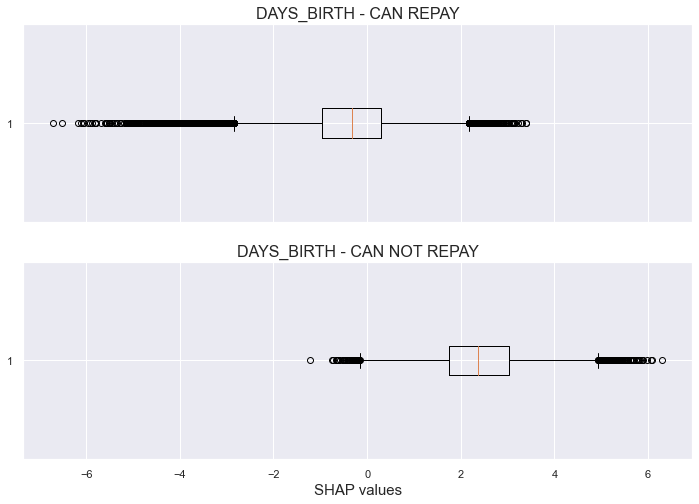

In [269]:
# Boxplot of shap_values of feature 'DAYS_BIRTH' according to the class (0 or 1)
sns.set_theme()
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(12, 8))
ax[0].boxplot(dict_pos.get('DAYS_BIRTH'), vert = False)
ax[0].set_title('DAYS_BIRTH - CAN REPAY', size = 16)
ax[1].boxplot(dict_neg.get('DAYS_BIRTH'), vert = False)
ax[1].set_title('DAYS_BIRTH - CAN NOT REPAY', size = 16)
ax[1].set_xlabel('SHAP values', size = 15)
plt.show()

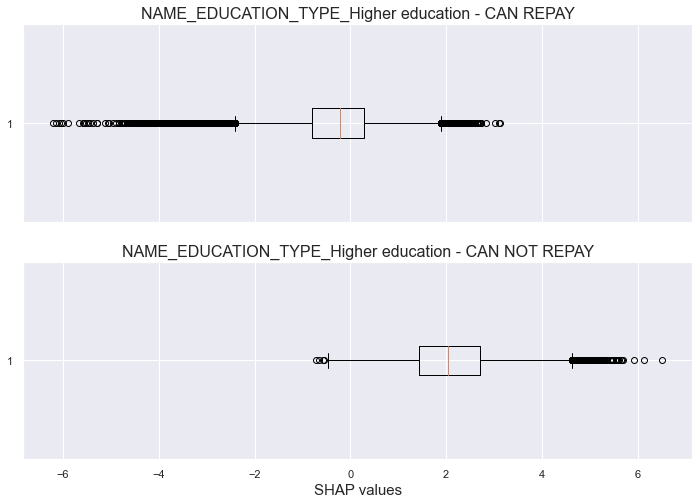

In [280]:
# Boxplot of shap_values of feature 'NAME_EDUCATION_TYPE_Higher education' according to the class (0 or 1)
sns.set_theme()
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(12, 8))
ax[0].boxplot(dict_pos.get('NAME_EDUCATION_TYPE_Higher education'), vert = False)
ax[0].set_title('NAME_EDUCATION_TYPE_Higher education - CAN REPAY', size = 16)
ax[1].boxplot(dict_neg.get('NAME_EDUCATION_TYPE_Higher education'), vert = False)
ax[1].set_title('NAME_EDUCATION_TYPE_Higher education - CAN NOT REPAY', size = 16)
ax[1].set_xlabel('SHAP values', size = 15)
plt.show()

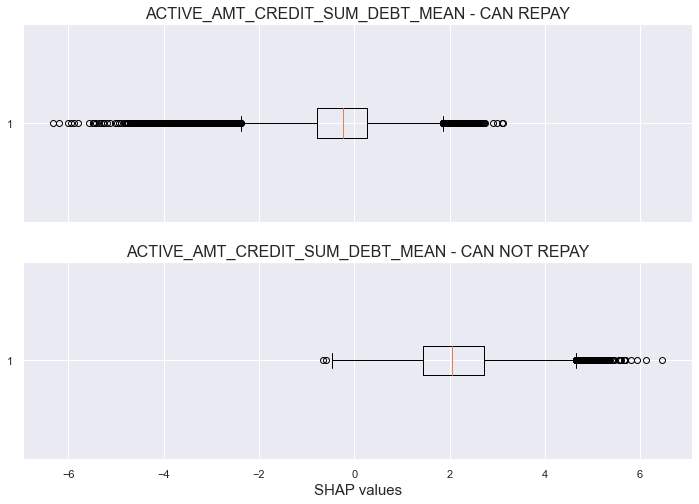

In [281]:
# Boxplot of shap_values of feature 'ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN' according to the class (0 or 1)
sns.set_theme()
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(12, 8))
ax[0].boxplot(dict_pos.get('ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN'), vert = False)
ax[0].set_title('ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN - CAN REPAY', size = 16)
ax[1].boxplot(dict_neg.get('ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN'), vert = False)
ax[1].set_title('ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN - CAN NOT REPAY', size = 16)
ax[1].set_xlabel('SHAP values', size = 15)
plt.show()

In [271]:
X.columns[index_feat]

Index(['DAYS_BIRTH', 'NAME_EDUCATION_TYPE_Higher education',
       'ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'AMT_GOODS_PRICE', 'EXT_SOURCE_1', 'AMT_CREDIT', 'PAYMENT_RATE',
       'AMT_ANNUITY', 'CODE_GENDER', 'INSTAL_AMT_PAYMENT_SUM',
       'APPROVED_CNT_PAYMENT_MEAN', 'OWN_CAR_AGE', 'INSTAL_DPD_MEAN',
       'PREV_AMT_ANNUITY_MEAN', 'ACTIVE_AMT_CREDIT_SUM_SUM', 'DAYS_ID_PUBLISH',
       'DAYS_EMPLOYED', 'NAME_FAMILY_STATUS_Married'],
      dtype='object')

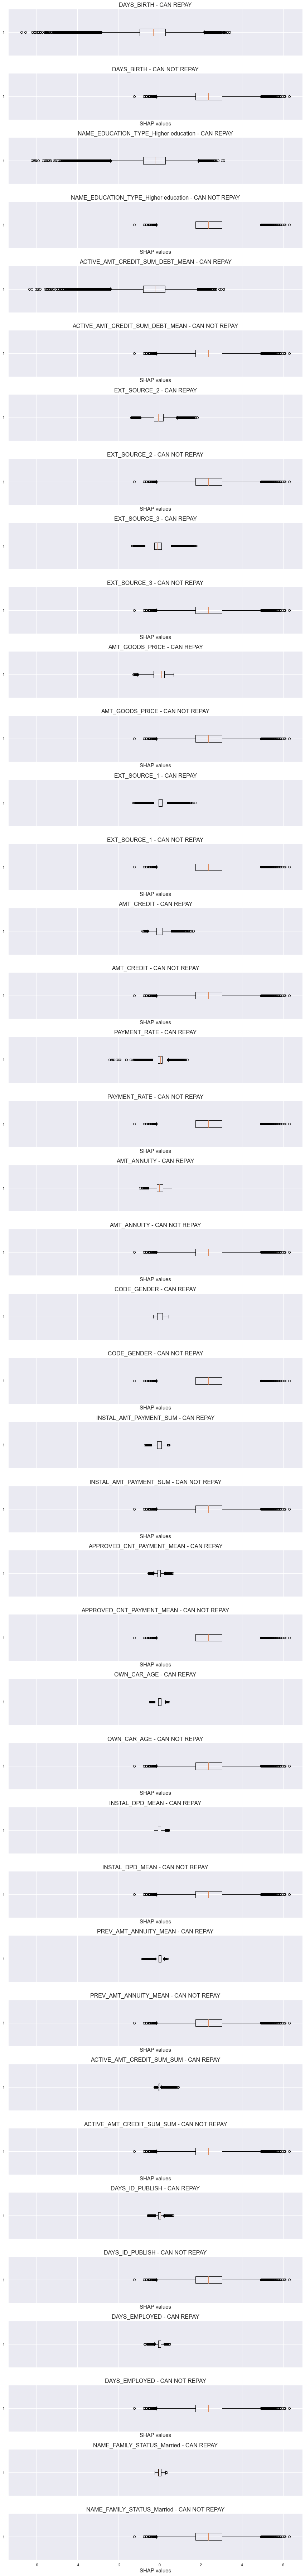

In [283]:
# Boxplot of shap_values of the 20 most important features according to the class (0 or 1)
sns.set_theme()
fig, ax = plt.subplots(40, 1, sharex = True, figsize=(12, 100))
for i, j in zip(range(0, 20, 1), range(0, 40, 2)):
    ax[j].boxplot(dict_pos.get(X.columns[index_feat[i]]), vert = False)
    ax[j].set_title(f'{X.columns[index_feat[i]]} - CAN REPAY', size = 16)
    ax[j+1].boxplot(dict_neg.get(X.columns[index_feat[0]]), vert = False)
    ax[j+1].set_title(f'{X.columns[index_feat[i]]} - CAN NOT REPAY', size = 16)
    ax[j+1].set_xlabel('SHAP values', size = 15)

fig.tight_layout()
plt.show()

In [81]:
# Create a dashboard with the explainerdashboard library
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

classifier_explainer = ClassifierExplainer(model_lgbm_1, X_test)
ExplainerDashboard(classifier_explainer).run()

Note: model_output=='probability'. For LGBMClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
No y labels were passed to the Explainer, so setting model_summary=False...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decisi

100%|===================| 48743/48744 [44:03<00:00]        

Calculating dependencies...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://192.168.0.25:8050
Dash is running on http://0.0.0.0:8050/

 * Serving Flask app "explainerdashboard.dashboards" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://192.168.0.25:8050/ (Press CTRL+C to quit)
192.168.0.25 - - [01/Jun/2022 23:12:55] "GET / HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:12:55] "GET /assets/bootstrap.min.css?m=1654115301.4908977 HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:12:55] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_4_1m1654115298.12.1.min.js HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:12:55] "GET /_dash-component-suites/dash/deps/react@16.v2_4_1m1654115298.14.0.min.js HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:12:55] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_4_1m1654115298.14.0.min.js HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:12:55] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_4_1m1654115298.8.1.min.js HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:12:55] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_13_1m1654115301.min.js HTTP/1.1" 200 -
192.168.0.25 - -

Calculating prediction probabilities...


192.168.0.25 - - [01/Jun/2022 23:13:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:02] "POST /_dash-update-component HTTP/1.1" 200 -


Calculating prediction probabilities...


192.168.0.25 - - [01/Jun/2022 23:13:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:02] "POST /_dash-update-component HTTP/1.1" 200 -


Calculating pred_percentiles...Calculating pred_percentiles...



192.168.0.25 - - [01/Jun/2022 23:13:11] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:11] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:13] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:19] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:13:20] "POST /_dash-u

pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:15:24] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:15:24] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:15:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:15:30] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:16:41] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:18] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:18:18] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:18:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:18] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:38] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:43] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:48] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:48] "POST /_dash-u

pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:18:49] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:54] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:55] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:18:58] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:02] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:19:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:02] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:19:03] "POST /_dash-u

pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!

192.168.0.25 - - [01/Jun/2022 23:19:03] "POST /_dash-update-component HTTP/1.1" 200 -


192.168.0.25 - - [01/Jun/2022 23:19:04] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:04] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:04] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:04] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:06] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:09] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:09] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:26] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:26] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:27] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:19:27] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:31] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:19:31] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:20:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:20:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:20:14] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:20:14] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:20:19] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:20:19] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:20:34] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:20:46] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:45] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:45] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:21:46] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:50] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:21:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:51] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:51] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:21:52] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:52] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:21:55] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:55] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:55] "POST /_dash-u

pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:21:56] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:56] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:56] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:56] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:21:57] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:57] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:57] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:21:57] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:21:58] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:06] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:22:07] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:08] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:22:09] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:10] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:10] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:11] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:16] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:17] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:17] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:32] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:32] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:32] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:22:32] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:36] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:37] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:46] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:46] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:50] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:51] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:54] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:22:54] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:01] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:01] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:01] "POST /_dash-u

pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:23:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:05] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:15] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:23:15] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:19] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:19] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:27] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:27] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:27] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:23:27] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:32] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:32] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:42] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:42] "POST /_dash-update-component HTTP/1.1" 200 -


pos_label should either be int or str in self.labels!
pos_label should either be int or str in self.labels!


192.168.0.25 - - [01/Jun/2022 23:23:43] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:47] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:23:47] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:24:19] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:25:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:25:02] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:25:04] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:25:04] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:25:06] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:25:08] "POST /_dash-update-component HTTP/1.1" 200 -
192.168.0.25 - - [01/Jun/2022 23:26:13] "POST /_dash-update-component HTTP/1.1" 204 -
192.168.0.25 - - [01/Jun/2022 23:26:13] "POST /_dash-u

In [83]:
# Save classifier_explainer
classifier_explainer.dump('classifier_explainer.joblib')

In [ ]:
# Load classifier_explainer
classifier_explainer = ClassifierExplainer.from_file('classifier_explainer.joblib')